# Linear Regression Assignment - Shrey Khurana (DS C41 February 2022) (EDS21120353)

## Importing Libraries

In [79]:
## Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn import metrics

In [80]:
# Supress Warning Messages
import warnings
warnings.filterwarnings('ignore')

## Steps followed in Linear Regression

**Step 1:** Reading and Understanding the Data provided

**Step 2:** Visualising the Data through various plots

**Step 3:** Preparing the data

**Step 4:** Splitting the Data into 2 different sets i.e. Training Set  and Testing Set

**Step 5:** Building the linear model

**Step 6:** Analysing the residual of train data and validating it.

**Step 7:** Making Predictions Using the Final Model

**Step 8:** Evaluating the model.
                                

## Step 1: Reading and Understanding the Data provided

In [81]:
# Reading the CSV file
df = pd.read_csv('day.csv')

In [82]:
# Check the content of file using head
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [83]:
# Checking the shape of the data fram
df.shape

(730, 16)

In [84]:
# Checking Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [85]:
# Checking nulls in Columns
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### It can be seen that there are No Nulls present in the data

In [86]:
# Getting insight details of the data fram using describe function
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


- #### Renaming the columns to proper names i.e yr,mnth,hum to year, month and humidity respectively.
- #### There are some columns which were supposed to be categorical but are integer values. So we will convert them to categorical variables. The columns are - month, season, weekday and weathersit.

In [87]:
# renaming the columns and changing in orginal dataset
# yr to year, mnth to month, hum to humidity'
df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace = True)
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [88]:
# Encoding the month column
df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [89]:
# Encoding the season column
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [90]:
# Checking the count of Season
df.groupby(by='season').season.count().sort_values(ascending=False)

season
fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [91]:
def weathersitencoding(x):
    if x==1:return 'Clear'
    elif x==2:return 'Mist'
    elif x==3:return 'Light Snow'
    else:return'Heavy Rain'
    
df['weathersit']=df['weathersit'].apply(weathersitencoding) 

In [92]:
#Checking the counweathersitt of weathersit
df.groupby(by='weathersit').weathersit.count().sort_values(ascending=False)

weathersit
Clear         463
Mist          246
Light Snow     21
Name: weathersit, dtype: int64

In [93]:
# Encoding the weekday column
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [94]:
# Checking Weekday count
df.groupby(by='weekday').weekday.count()

weekday
fri    104
mon    105
sat    104
sun    104
thu    104
tue    105
wed    104
Name: weekday, dtype: int64

In [95]:
## Dropping the unwanted columns
df.drop(['instant','dteday'],axis=1,inplace=True)

In [96]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,spring,0,jan,0,mon,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,jan,0,tue,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 80.0+ KB


## Step 2: Visualising the Data through various plots

#### Visualising the Categorical Columns

In [98]:
cat_cols=['season','month','weekday','weathersit']
df_categorical=df[cat_cols]

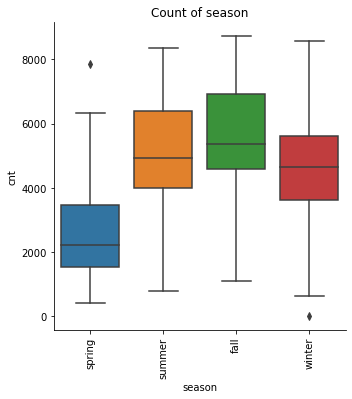

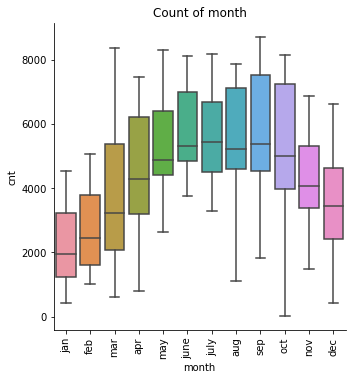

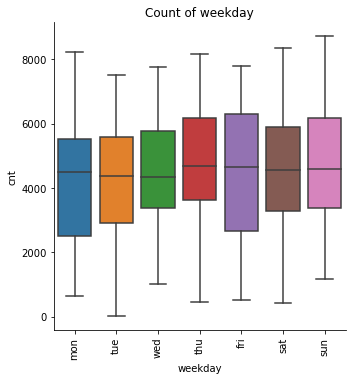

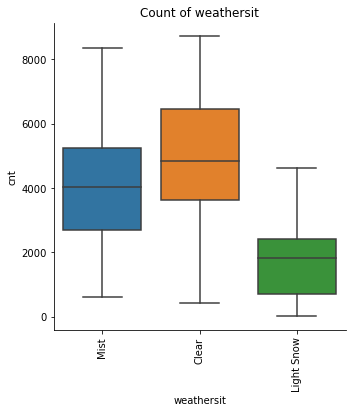

In [99]:
for col in df_categorical.columns:
    sns.catplot(x=col,y='cnt',data=df,kind='box')
    plt.title('Count of '+col)
    plt.xticks(rotation=90)
    plt.show();

- It can be seen that there is more demand for bikes in Summer and Fall weather
- Seasons and months are related to each other and hence there is more demand for bikes in the months from May to October

In [100]:
def plot_cat_columns(column):
    plt.figure(figsize = (14,8))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt',data=df,palette='pastel')
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data=df, hue='year',palette='muted')
    plt.legend(labels=['2018', '2019'])
    plt.show()

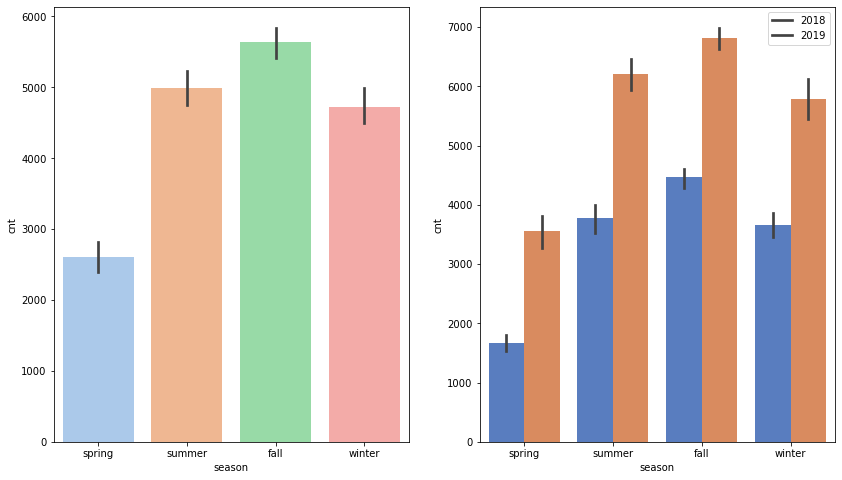

In [101]:
plot_cat_columns('season')

- Fall season has most bike booking
- The booking count is increasing for every season as we move from 2018 to 2019

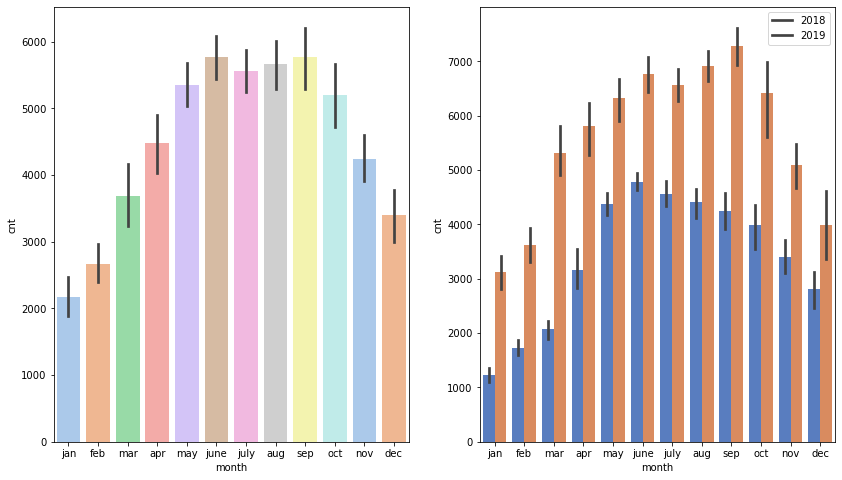

In [102]:
plot_cat_columns('month')

- Most of the bike bookings are done in folowing months - May, June, July, August, September and October.
- The bookings increases gradually to the mod of the year and then decreases as we move towards the end of the year.
- Number of bookings for each month has increased as we move from 2018 to 2019

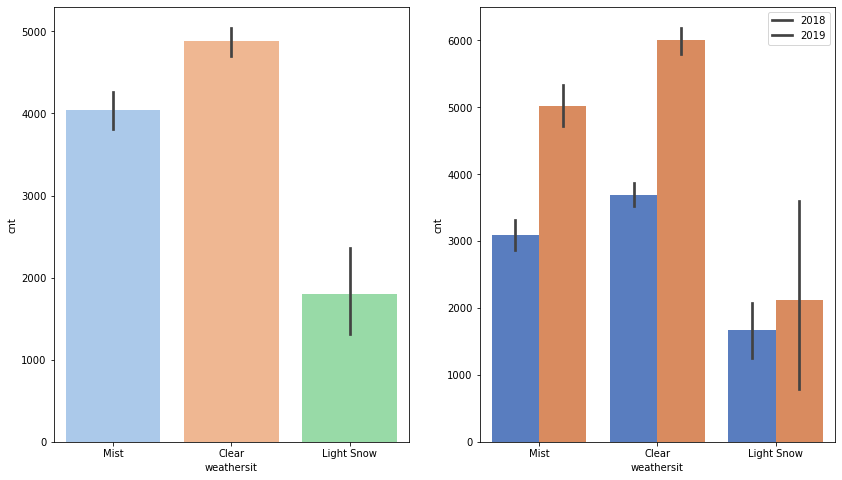

In [103]:
plot_cat_columns('weathersit')

- Clear weather has highest number of bike bookings
- The number of bookings has increaded for each weather as we move from 2018 to 2019

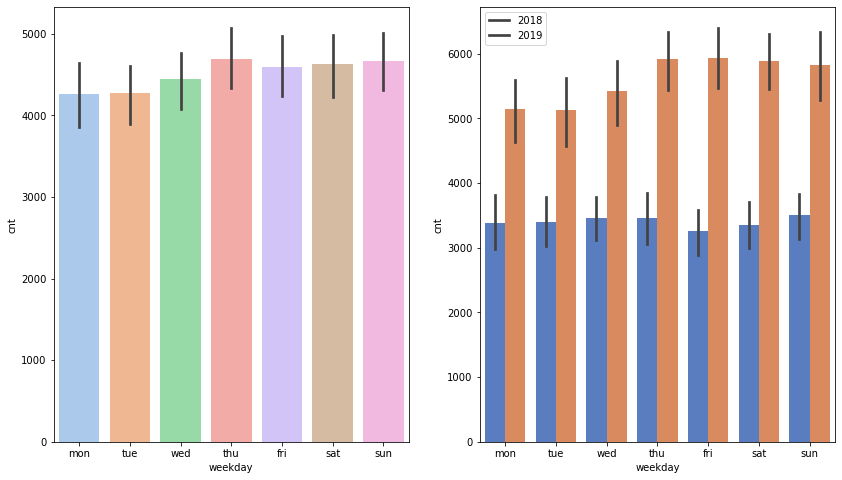

In [104]:
plot_cat_columns('weekday')

- Thursday, Friday, Saturday and Sunday weekdays have the highest number of bookings.
- The number of bookings per weekday has increased as we move from 2018 to 2019.

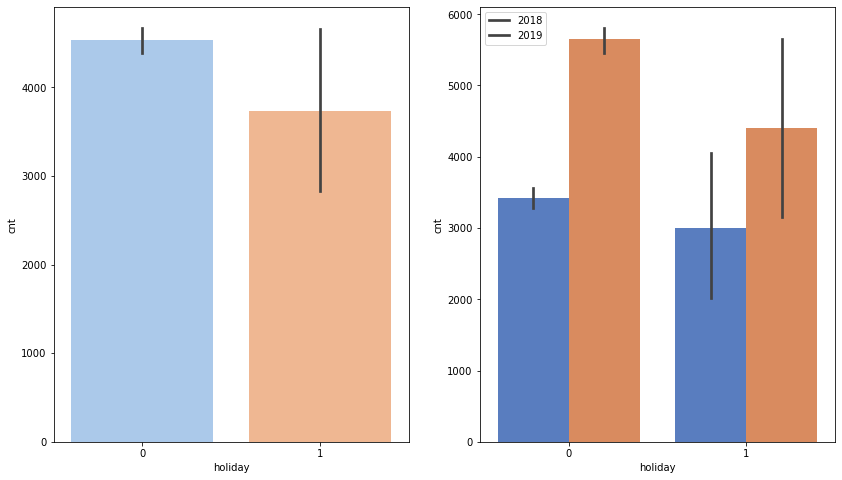

In [105]:
plot_cat_columns('holiday')

- When no holiday then there are less bike bookings as people like to stay home and take rest.

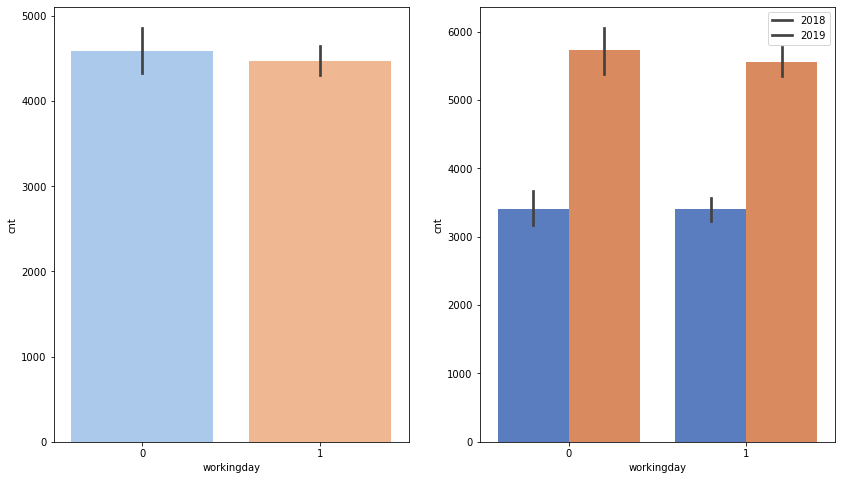

In [106]:
plot_cat_columns('workingday')

- Booking is same for working and non working day.
- The number of bookings per working or non working day increases as we move from 2018 to 2019.

#### Visualising the Numerical Columns

In [107]:
#changing datatypes of numerical columns to appropriate types
df[['casual','registered','cnt']]=df[['casual','registered','cnt']].astype('float')

In [108]:
df_numeric = df.select_dtypes(include=['float64'])

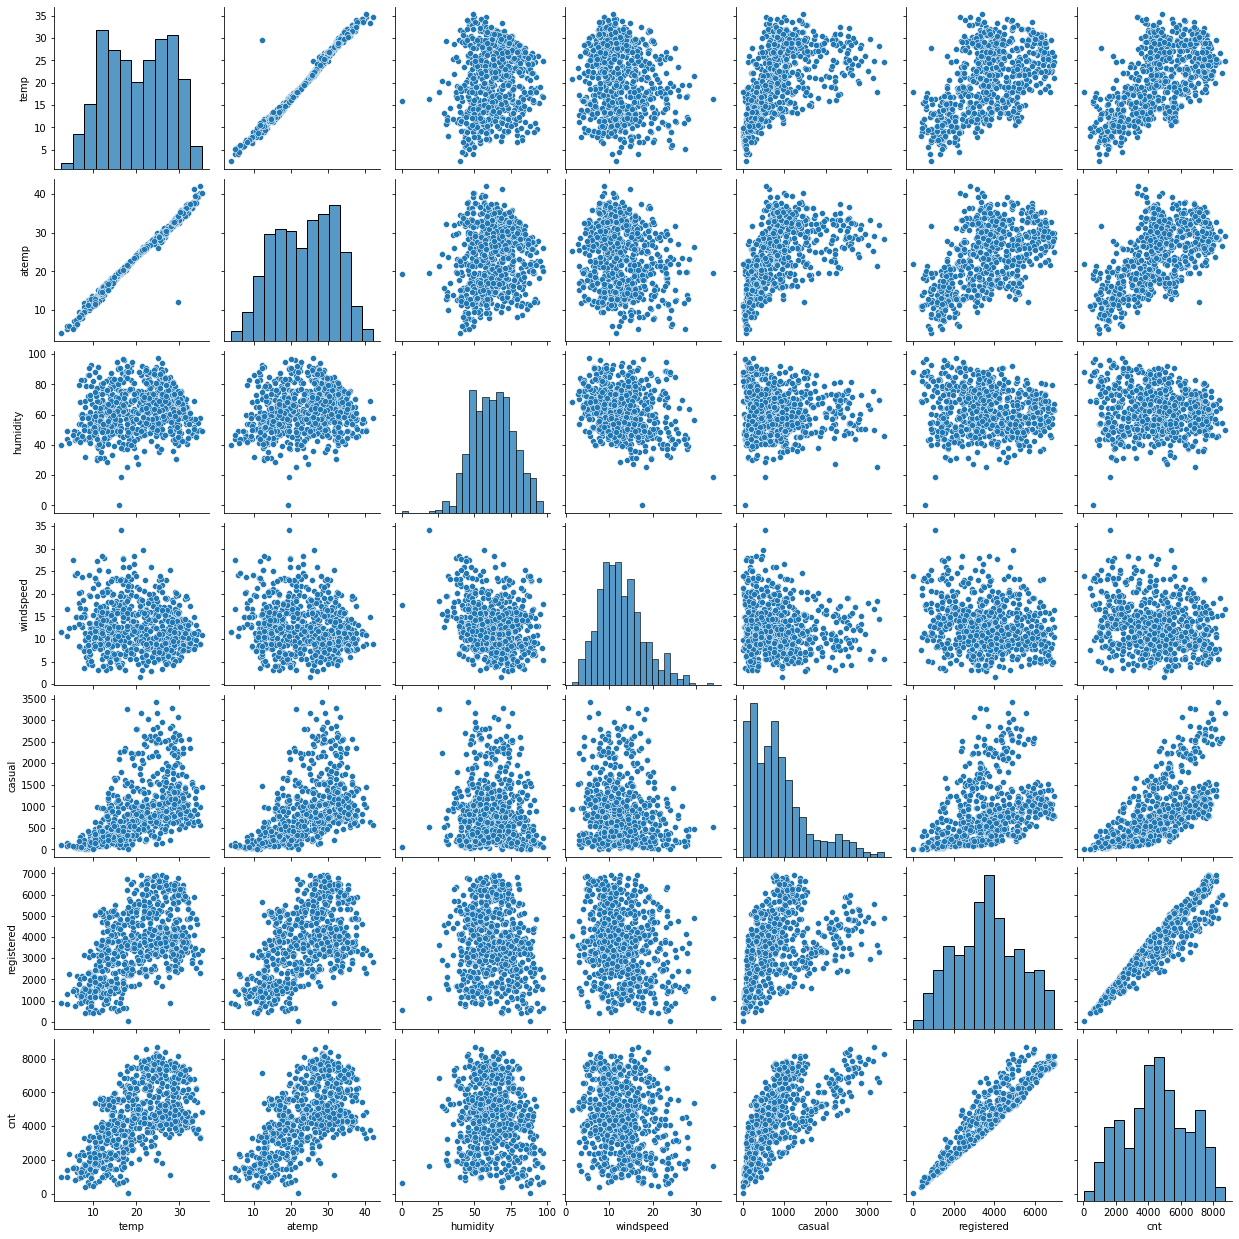

In [109]:
sns.pairplot(df_numeric)
plt.show()

- It can be observed that temp and atemp are highly Correalted.
- Casual and registerd are also highly correlated.
- It can be seen that windspeed,hum are not related to cnt.

#### Checking the Correlation between numerical Variables

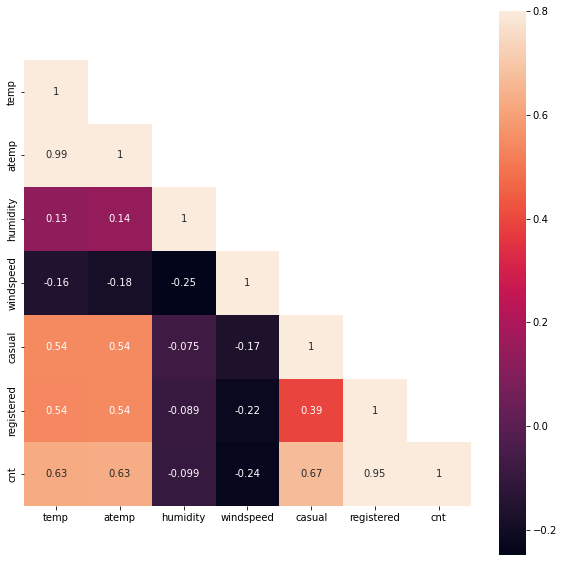

In [110]:
mask = np.array(df_numeric.corr())
mask[ np.tril_indices_from(mask) ] = False
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(df_numeric.corr(), mask=mask, vmax=0.8, square=True, annot=True);

There is a High correlation between temp and atemp and One of them needs to be dropped. The variable which needs to be dropped will be based on the p value and VIF with respect to other variables.

In [111]:
df.drop(['atemp','casual','registered'],axis=1,inplace=True)

In [112]:
df.head(20)

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,Mist,14.110847,80.5833,10.749882,985.0
1,spring,0,jan,0,tue,1,Mist,14.902598,69.6087,16.652113,801.0
2,spring,0,jan,0,wed,1,Clear,8.050924,43.7273,16.636703,1349.0
3,spring,0,jan,0,thu,1,Clear,8.200000,59.0435,10.739832,1562.0
4,spring,0,jan,0,fri,1,Clear,9.305237,43.6957,12.522300,1600.0
5,spring,0,jan,0,sat,0,Clear,8.378268,51.8261,6.000868,1606.0
6,spring,0,jan,0,sun,0,Mist,8.057402,49.8696,11.304642,1510.0
7,spring,0,jan,0,mon,1,Mist,6.765000,53.5833,17.875868,959.0
8,spring,0,jan,0,tue,1,Clear,5.671653,43.4167,24.250650,822.0
9,spring,0,jan,0,wed,1,Clear,6.184153,48.2917,14.958889,1321.0


## Step 3: Preparing the data

In [113]:
df_categorical.head()

,season,month,weekday,weathersit
0,spring,jan,mon,Mist
1,spring,jan,tue,Mist
2,spring,jan,wed,Clear
3,spring,jan,thu,Clear
4,spring,jan,fri,Clear


In [114]:
df_numeric.head()

,temp,atemp,humidity,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


In [115]:
# Assigning the dummy variables for season,mnth,weekday and weathersit
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df = pd.concat([df, df_dummies], axis=1)
df.drop(list(df_categorical.columns), axis=1,inplace=True)

In [116]:
df.head(20)

,year,holiday,workingday,temp,humidity,windspeed,cnt,season_spring,season_summer,season_winter,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Snow,weathersit_Mist
0,0,0,1,14.110847,80.5833,10.749882,985.0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801.0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,8.378268,51.8261,6.000868,1606.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
6,0,0,0,8.057402,49.8696,11.304642,1510.0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
7,0,0,1,6.765000,53.5833,17.875868,959.0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
8,0,0,1,5.671653,43.4167,24.250650,822.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9,0,0,1,6.184153,48.2917,14.958889,1321.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   humidity               730 non-null    float64
 5   windspeed              730 non-null    float64
 6   cnt                    730 non-null    float64
 7   season_spring          730 non-null    uint8  
 8   season_summer          730 non-null    uint8  
 9   season_winter          730 non-null    uint8  
 10  month_aug              730 non-null    uint8  
 11  month_dec              730 non-null    uint8  
 12  month_feb              730 non-null    uint8  
 13  month_jan              730 non-null    uint8  
 14  month_july             730 non-null    uint8  
 15  month_

In [118]:
df.shape

(730, 29)

## Step 4: Splitting the Data into 2 different sets i.e. Training Set  and Testing Set

In [119]:
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [120]:
# check the shape of training datatset
df_train.shape

(510, 29)

In [121]:
# check the shape of testing datatset
df_test.shape

(219, 29)

#### Rescaling the features using MinMax scaling

In [122]:
scaler = MinMaxScaler()

In [123]:
df_train.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,season_spring,season_summer,season_winter,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Snow,weathersit_Mist
653,1,0,1,19.201653,55.8333,12.208807,7534.0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,70.4167,11.083475,7216.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066.0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,10.489153,48.3333,23.500518,1796.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220.0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [124]:
df_test.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,season_spring,season_summer,season_winter,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Snow,weathersit_Mist
184,0,1,0,29.793347,63.7917,5.459106,6043.0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,32.082500,59.2083,7.625404,6211.0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,19.270000,81.2917,13.250121,2659.0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,30.5000,19.583229,4968.0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [125]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['temp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [126]:
df_train.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,season_spring,season_summer,season_winter,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Snow,weathersit_Mist
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,1


## Step 5: Building the linear model

In [127]:
y_train = df_train.pop('cnt')
X_train = df_train

In [128]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 12)
rfe = rfe.fit(X_train, y_train)

In [129]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('month_aug', False, 12),
 ('month_dec', False, 4),
 ('month_feb', False, 5),
 ('month_jan', False, 2),
 ('month_july', True, 1),
 ('month_june', False, 16),
 ('month_mar', False, 17),
 ('month_may', False, 9),
 ('month_nov', False, 3),
 ('month_oct', False, 14),
 ('month_sep', True, 1),
 ('weekday_mon', False, 11),
 ('weekday_sat', False, 7),
 ('weekday_sun', False, 8),
 ('weekday_thu', False, 15),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 13),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [130]:
RFE_Columns = X_train.columns[rfe.support_]
print(RFE_Columns)

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'month_july', 'month_sep',
       'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')


In [131]:
X_train.columns[~rfe.support_]

Index(['workingday', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_june', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed'],
      dtype='object')

#### Building the model using Stasmodel for detailed statistics analysis

In [132]:
# Creating X_test dataframe with RFE variables
X_train_rfe = X_train[RFE_Columns]

In [133]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def checkVIFValue(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [134]:
# Building FIRST Linear Regression Model
import statsmodels.api as sm 
X_train1= sm.add_constant(X_train_rfe)
lm1= sm.OLS(y_train,X_train1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          1.69e-190
Time:                        11:29:39   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.28

In [135]:
checkVIFValue(X_train1.drop('const',axis=1))

,Features,VIF
3,humidity,28.06
2,temp,16.02
4,windspeed,4.65
5,season_spring,4.01
7,season_winter,3.35
6,season_summer,2.78
11,weathersit_Mist,2.28
0,year,2.08
8,month_july,1.58
9,month_sep,1.38


- The R Square value is: 0.842
- The Adjusted R square value is: 0.838
- Even though the P value is significant but we need to drop humidity column because of high VIF value.

In [136]:
# Building SECOND Linear Regression Model
X_train2=X_train1.drop('humidity',axis=1)
lm2 = sm.OLS(y_train,X_train1).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          1.69e-190
Time:                        11:29:40   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.28

In [137]:
checkVIFValue(X_train2.drop('const',axis=1))

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,season_summer,2.21
4,season_spring,2.08
0,year,2.07
6,season_winter,1.79
7,month_july,1.58
10,weathersit_Mist,1.55
8,month_sep,1.34
9,weathersit_Light Snow,1.08


- After dropping the humidity column, we can see still temp column has VIF>5 so we will drop this column and build our model again.

In [138]:
# Building THIRD Linear Regression Model
X_train3=X_train2.drop('temp',axis=1)
lm3 = sm.OLS(y_train,X_train3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.1
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          3.17e-149
Time:                        11:29:41   Log-Likelihood:                 406.24
No. Observations:                 510   AIC:                            -790.5
Df Residuals:                     499   BIC:                            -743.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.58

In [139]:
checkVIFValue(X_train3.drop('const',axis=1))

,Features,VIF
2,windspeed,3.81
3,season_spring,2.07
4,season_summer,2.00
0,year,1.83
5,season_winter,1.74
9,weathersit_Mist,1.51
6,month_july,1.19
7,month_sep,1.16
8,weathersit_Light Snow,1.08
1,holiday,1.04


- When we remove the temp, we can see that the value of R Square and Adjusted R square value reduced. So it means that the temp is important for analysis so removing the column which has the highest VIF (i.e. windspeed) value and building the model again

In [140]:
# Building FOURTH Linear Regression Model
X_train_lm=X_train2.drop('windspeed',axis=1)
lm4 = sm.OLS(y_train,X_train_lm).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.1
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          2.80e-181
Time:                        11:29:42   Log-Likelihood:                 481.98
No. Observations:                 510   AIC:                            -942.0
Df Residuals:                     499   BIC:                            -895.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

In [141]:
checkVIFValue(X_train_lm.drop('const',axis=1))

,Features,VIF
2,temp,4.22
0,year,2.06
4,season_summer,1.93
5,season_winter,1.58
6,month_july,1.58
9,weathersit_Mist,1.55
3,season_spring,1.40
7,month_sep,1.34
8,weathersit_Light Snow,1.07
1,holiday,1.04


#### Finally the Model obtained with 10 significant feature variables with a VIF value less than 5 and the P-Value is also very small.

In [142]:
X_train_new = X_train_lm.drop(['const'], axis=1)
X_train_new

,year,holiday,temp,season_spring,season_summer,season_winter,month_july,month_sep,weathersit_Light Snow,weathersit_Mist
653,1,0,0.509887,0,0,1,0,0,0,0
576,1,0,0.815169,0,0,0,1,0,0,0
426,1,0,0.442393,1,0,0,0,0,0,1
728,1,0,0.245101,1,0,0,0,0,0,0
482,1,0,0.395666,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
526,1,0,0.824514,0,1,0,0,0,0,1
578,1,0,0.863973,0,0,0,0,0,0,0
53,0,0,0.202618,1,0,0,0,0,0,0
350,0,0,0.248216,0,0,1,0,0,0,1


## Step 6: Analysing the residual of train data and validating it.

In [143]:
X_train_lm

,const,year,holiday,temp,season_spring,season_summer,season_winter,month_july,month_sep,weathersit_Light Snow,weathersit_Mist
653,1.0,1,0,0.509887,0,0,1,0,0,0,0
576,1.0,1,0,0.815169,0,0,0,1,0,0,0
426,1.0,1,0,0.442393,1,0,0,0,0,0,1
728,1.0,1,0,0.245101,1,0,0,0,0,0,0
482,1.0,1,0,0.395666,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0,1,0,0,0,0,1
578,1.0,1,0,0.863973,0,0,0,0,0,0,0
53,1.0,0,0,0.202618,1,0,0,0,0,0,0
350,1.0,0,0,0.248216,0,0,1,0,0,0,1


In [144]:
y_train_pred=lm4.predict(X_train_lm)

Text(0.5, 0, 'Errors')

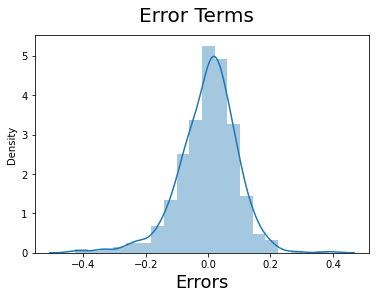

In [145]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) # Plot heading 
plt.xlabel('Errors', fontsize = 18)# X-label

- From above plot it is clear that the mean is centered at 0 and error are follwing the Normal Distribution

In [146]:
## Calculating the R Square and RMSE value for the training set
print('r2 Score for Train Set :',metrics.r2_score(y_train,y_train_pred))
print('RMSE for Train Set:',np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

r2 Score for Train Set : 0.8243232417031895
RMSE for Train Set: 0.09404297712376589


In [147]:
checkVIFValue(X_train_new)

,Features,VIF
2,temp,4.22
0,year,2.06
4,season_summer,1.93
5,season_winter,1.58
6,month_july,1.58
9,weathersit_Mist,1.55
3,season_spring,1.40
7,month_sep,1.34
8,weathersit_Light Snow,1.07
1,holiday,1.04


- VIF are less than 5

## Step 7: Making Predictions Using the Final Model

In [148]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [149]:
#Dividing to X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [150]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [151]:
# Making predictions
y_test_pred = lm4.predict(X_test_new)

## Step 8: Evaluating the model.

In [152]:
r2 = r2_score(y_test, y_test_pred)
round(r2,4)

0.809

In [153]:
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7808


Text(0, 0.5, 'y_pred')

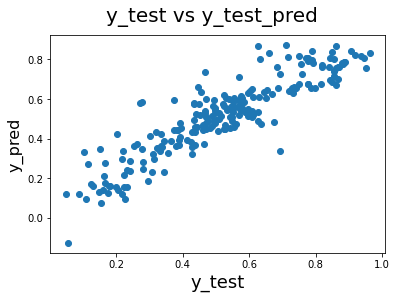

In [154]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [155]:
# Calculating the r2 and RMSE for Test Set
print('r2_score For Test set:',metrics.r2_score(y_test,y_test_pred))
print('RMSE for Test set :',np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

r2_score For Test set: 0.8089780460935858
RMSE for Test set : 0.09404297712376589


In [156]:
round(lm4.params,4)

const                    0.1503
year                     0.2325
holiday                 -0.1008
temp                     0.5034
season_spring           -0.0764
season_summer            0.0355
season_winter            0.0842
month_july              -0.0527
month_sep                0.0810
weathersit_Light Snow   -0.2999
weathersit_Mist         -0.0798
dtype: float64

#### Equation of Best FItted Line:
<br/>
<font size = 4> 
    <i>
cnt = 1.503 + 0.2325 * year - 0.1008 * holiday + 0.5034 * temp - 0.0764 * season_spring + 0.0355 * season_summer + 0.0842 * season_winter - 0.0527 * month_july + 0.0810 * month_sep - 0.2999 * weathersit_Light Snow - 0.0798 * weathersit_Mist 
    </i>
</font>

# Comparing Training and Testing Dataset

- R^2 value for Train Dataset: 0.8243232417031895
    
- R^2 value for Test Dataset: 0.8089780460935858
    
- Adjusted R^2 value for Train Dataset: 0.821
    
- Adjusted R^2 value for Test Dataset: 0.7808
    
- RMSE for Train Dataset: 0.09404297712376589
    
- RMSE for Test Datset: 0.09404297712376589
